##Convolutional Layer
In this notebook, we visualize four filtered outputs (a.k.a. activation maps) of a convolutional layer.

In this example, we are defining four filters that are applied to an input image by initializing the weights of a convolutional layer, but a trained CNN will learn the values of these weights.



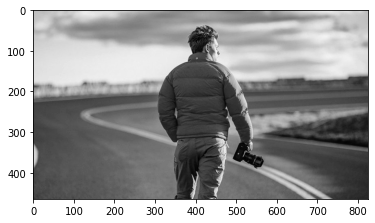

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2

image=cv2.imread('img.jpg')
gray_img=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
# normalize, rescale entries to lie in [0,1]
#image=image.astype("float")/255
 
plt.imshow(gray_img,cmap='gray')
#plt.show()

#Define and visualize the filters

In [10]:
filter_val=np.array([[-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1], [-1, -1, 1, 1]])
print('filter:',filter_val.shape)


filter: (4, 4)


filter: [[-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]
 [-1 -1  1  1]]


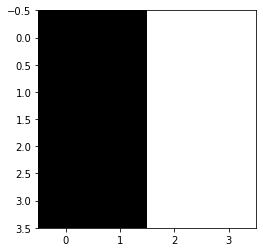

In [11]:
# Defining four different filters, 
# all of which are linear combinations of the `filter_vals` defined above
#Defining four more filters

filter1=filter_val
filter2=-1*(filter1)
filter3=filter1.T
filter4=filter3.T 

print('filter:',filter4)
plt.imshow(filter1,cmap='gray')

#Visualizing the filters

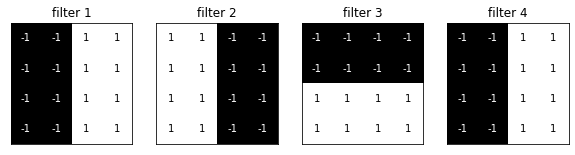

In [12]:
filters=np.array([filter1,filter2,filter3,filter4])
fig=plt.figure(figsize=(10,5))
for i in range(4):
  ax=fig.add_subplot(1,4,i+1,xticks=[],yticks=[])
  ax.imshow(filters[i],cmap='gray')
  ax.set_title('filter %s' %str(i+1))
  width,height=filters[i].shape
  for x in range(width):
    for y in range(height):
      ax.annotate(str(filters[i][x][y]),xy=(y,x),
                  horizontalalignment='center',
                  verticalalignment='center',
                  color='white' if filters[i][x][y]<0 else 'black')


##Define a convolutional layer
The various layers that make up any neural network are documented, here. For a convolutional neural network, we'll start by defining a:

Convolutional layer
Initialize a single convolutional layer so that it contains all your created filters. Note that you are not training this network; you are initializing the weights in a convolutional layer so that you can visualize what happens after a forward pass through this network!

__init__ and forward
To define a neural network in PyTorch, you define the layers of a model in the function __init__ and define the forward behavior of a network that applyies those initialized layers to an input (x) in the function forward. In PyTorch we convert all inputs into the Tensor datatype, which is similar to a list data type in Python.

Below, I define the structure of a class called Net that has a convolutional layer that can contain four 3x3 grayscale filters.

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F
    
# define a neural network with a single convolutional layer with four filters
class Net(nn.Module):
    
    def __init__(self, weight):
        super(Net, self).__init__()
        # initializes the weights of the convolutional layer to be the weights of the 4 defined filters
        k_height, k_width = weight.shape[2:]
        # defines the convolutional layer, assumes there are 4 grayscale filters
        # torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
        self.conv = nn.Conv2d(1, 4, kernel_size=(k_height, k_width), bias=False)
        self.conv.weight = torch.nn.Parameter(weight)
        # define a pooling layer
        self.pool = nn.MaxPool2d(2, 2)

    def forward(self, x):
        # calculates the output of a convolutional layer
        # pre- and post-activation
        conv_x = self.conv(x)
        activated_x = F.relu(conv_x)
        # applies pooling layer
        pooled_x = self.pool(activated_x)
        
        
        # returns both layers
        return conv_x, activated_x,pooled_x
    
# instantiate the model and set the weights
weight = torch.from_numpy(filters).unsqueeze(1).type(torch.FloatTensor)
model = Net(weight)


#Visualize the output of each filter
First, we'll define a helper function, viz_layer that takes in a specific layer and number of filters (optional argument), and displays the output of that layer once an image has been passed through.

In [0]:
# helper function for visualizing the output of a given layer
# default number of filters is 4
def viz_layer(layer, n_filters= 4):
    fig = plt.figure(figsize=(20, 20))
    
    for i in range(n_filters):
        ax = fig.add_subplot(1, n_filters, i+1, xticks=[], yticks=[])
        # grab layer outputs
        ax.imshow(np.squeeze(layer[0,i].data.numpy()), cmap='gray')
        ax.set_title('Output %s' % str(i+1))

#ReLU activation
In this model, we've used an activation function that scales the output of the convolutional layer. We've chose a ReLU function to do this, and this function simply turns all negative pixel values in 0's (black). See the equation pictured below for input pixel values, x.



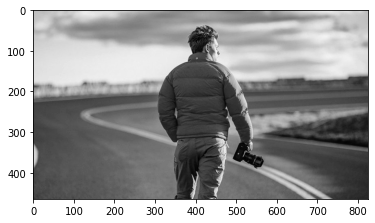

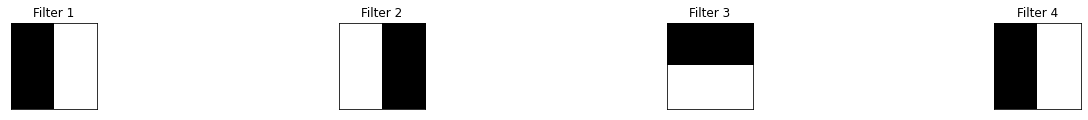

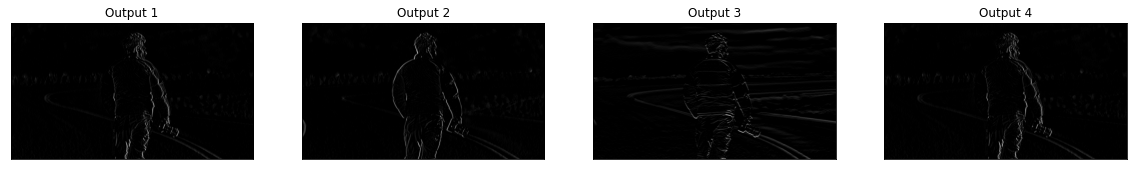

In [15]:
# plot original image
plt.imshow(gray_img, cmap='gray')

# visualize all filters
fig = plt.figure(figsize=(12, 6))
fig.subplots_adjust(left=0, right=1.5, bottom=0.8, top=1, hspace=0.05, wspace=0.05)
for i in range(4):
    ax = fig.add_subplot(1, 4, i+1, xticks=[], yticks=[])
    ax.imshow(filters[i], cmap='gray')
    ax.set_title('Filter %s' % str(i+1))

    
# convert the image into an input Tensor
gray_img_tensor = torch.from_numpy(gray_img).unsqueeze(0).unsqueeze(1)

# get all the layers 
conv_layer, activated_layer, pooled_layer = model(gray_img_tensor.float())

# visualize the output of the activated conv layer
viz_layer(activated_layer)

#Visualize the output of the pooling layer
Then, take a look at the output of a pooling layer. The pooling layer takes as input the feature maps pictured above and reduces the dimensionality of those maps, by some pooling factor, by constructing a new, smaller image of only the maximum (brightest) values in a given kernel area.

Take a look at the values on the x, y axes to see how the image has changed size.

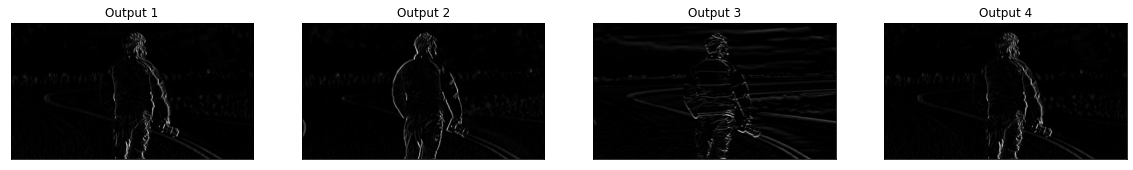

In [16]:
# visualize the output of the pooling layer
viz_layer(pooled_layer)

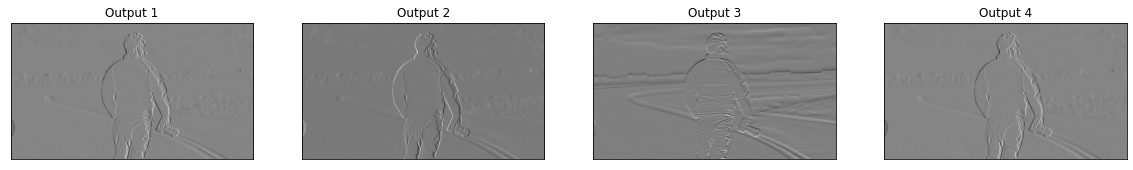

In [17]:
# visualize the output of the pooling layer
viz_layer(conv_layer)